<a href="https://colab.research.google.com/github/maknoonisar/pak5cities-temp-prediction/blob/main/5_cities_tempprediction2024.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Python
import pandas as pd
from prophet import Prophet

In [ ]:
import pandas as pd

# Attempt to read the CSV file with a different encoding and skip bad lines
df = pd.read_csv('/content/Islamabad Daily Historical Data 2010 2022.csv', encoding='latin1', on_bad_lines='skip')
df.head()




,time,temperature_2m_max (°C),temperature_2m_min (°C),temperature_2m_mean (°C),apparent_temperature_max (°C),apparent_temperature_min (°C),apparent_temperature_mean (°C)
0,2010-01-01T00:00,19.4,3.9,10.6,16.2,1.1,8.0
1,2010-01-02T00:00,18.3,4.1,10.7,15.5,1.2,8.2
2,2010-01-03T00:00,14.9,6.1,10.6,12.2,4.0,8.4
3,2010-01-04T00:00,16.7,4.2,9.6,13.3,1.8,7.1
4,2010-01-05T00:00,19.3,3.1,10.4,16.0,0.5,7.9


In [ ]:
# Display the first few rows to inspect the data
print(df.head())

# Display the shape of the dataframe to understand its structure
print(df.shape)

# Display the columns to check for any inconsistencies
print(df.columns)

               time  temperature_2m_max (°C)  temperature_2m_min (°C)  \
0  2010-01-01T00:00                     19.4                      3.9   
1  2010-01-02T00:00                     18.3                      4.1   
2  2010-01-03T00:00                     14.9                      6.1   
3  2010-01-04T00:00                     16.7                      4.2   
4  2010-01-05T00:00                     19.3                      3.1   

   temperature_2m_mean (°C)  apparent_temperature_max (°C)  \
0                      10.6                           16.2   
1                      10.7                           15.5   
2                      10.6                           12.2   
3                       9.6                           13.3   
4                      10.4                           16.0   

   apparent_temperature_min (°C)  apparent_temperature_mean (°C)  
0                            1.1                             8.0  
1                            1.2                      

               time  temperature_2m_max (°C)  temperature_2m_min (°C)  \
0  2010-01-01T00:00                     19.4                      3.9   
1  2010-01-02T00:00                     18.3                      4.1   
2  2010-01-03T00:00                     14.9                      6.1   
3  2010-01-04T00:00                     16.7                      4.2   
4  2010-01-05T00:00                     19.3                      3.1   

   temperature_2m_mean (°C)  apparent_temperature_max (°C)  \
0                      10.6                           16.2   
1                      10.7                           15.5   
2                      10.6                           12.2   
3                       9.6                           13.3   
4                      10.4                           16.0   

   apparent_temperature_min (°C)  apparent_temperature_mean (°C)  
0                            1.1                             8.0  
1                            1.2                      

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpuij8egle/evy4cdev.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpuij8egle/rnco1dgy.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=84778', 'data', 'file=/tmp/tmpuij8egle/evy4cdev.json', 'init=/tmp/tmpuij8egle/rnco1dgy.json', 'output', 'file=/tmp/tmpuij8egle/prophet_modelfaacsvl5/prophet_model-20240715054226.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
05:42:26 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
05:42:27 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Forecast results have been saved to '/content/2010-2022forecast_results.csv'


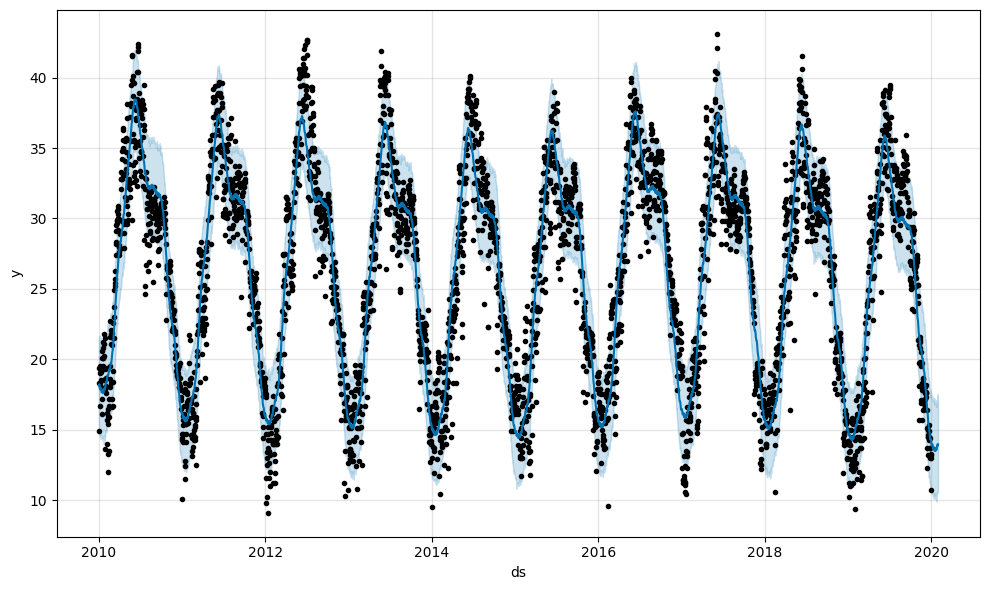

In [ ]:
import pandas as pd
from prophet import Prophet

# Load the data with a different encoding
df = pd.read_csv('/content/Islamabad Daily Historical Data 2010 2022.csv', delimiter=',', encoding='latin1', on_bad_lines='skip')

# Display the first few rows to inspect the data
print(df.head())

# Display the shape of the dataframe to understand its structure
print(df.shape)

# Display the columns to check for any inconsistencies
print(df.columns)

# Step 2: Prepare the Data
# Rename 'time' to 'ds' and select the 'temperature_2m_max (°C)' column as 'y'
df.rename(columns={'time': 'ds', 'temperature_2m_max (°C)': 'y'}, inplace=True)
df['ds'] = pd.to_datetime(df['ds'])  # Convert the 'ds' column to datetime format

# Check the prepared data
print(df.head())

# Step 3: Fit the Model
m = Prophet()
m.fit(df[['ds', 'y']])

# Step 4: Make a Future DataFrame
future = m.make_future_dataframe(periods=30)  # Forecast for the next 30 days

# Step 5: Predict the Future
forecast = m.predict(future)

# Step 6: Plot the Forecast
fig = m.plot(forecast)
fig.show()

# Save the forecast results to a CSV file
forecast[['ds', 'yhat']].to_csv('/content/2010-2022forecast_results.csv', index=False)

# Print a message to indicate the file has been saved
print("Forecast results have been saved to '/content/2010-2022forecast_results.csv'")






1. Historical Data (Black Dots):
These dots are plotted to show the actual observed values for the time series up to the present day. This allows you to see how well the model's forecast aligns with the past observations.

2. Forecasted Values (Blue Line):
This line represents the predicted values by the Prophet model. It continues from the last point of the historical data into the future for the specified forecast period (30 days in your case).

3. Uncertainty Intervals (Shaded Area):
The shaded area around the blue line represents the 80% and 95% uncertainty intervals by default. These intervals show the range within which the true future values are likely to fall. A wider shaded area indicates greater uncertainty in the predictions.

In [ ]:
#extra code to check the accuracy of the model

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpyypcw3x5/t471gz3f.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpyypcw3x5/3mdl1mow.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=59299', 'data', 'file=/tmp/tmpyypcw3x5/t471gz3f.json', 'init=/tmp/tmpyypcw3x5/3mdl1mow.json', 'output', 'file=/tmp/tmpyypcw3x5/prophet_modelvmw29ghp/prophet_model-20240729055300.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
05:53:00 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


         time  temperature_2m_max (Â°C)  temperature_2m_min (Â°C)  \
0  09/04/2024                      31.6                      17.3   
1  10/04/2024                      28.0                      19.7   
2  11/04/2024                      28.6                      18.7   
3  12/04/2024                      29.5                      18.7   
4  13/04/2024                      23.8                      17.5   

   rain_sum (mm)  
0            0.0  
1            0.0  
2            0.1  
3            0.0  
4           11.5  
(108, 4)
Index(['time', 'temperature_2m_max (Â°C)', 'temperature_2m_min (Â°C)',
       'rain_sum (mm)'],
      dtype='object')
          ds     y  temperature_2m_min (Â°C)  rain_sum (mm)
0 2024-04-09  31.6                      17.3            0.0
1 2024-04-10  28.0                      19.7            0.0
2 2024-04-11  28.6                      18.7            0.1
3 2024-04-12  29.5                      18.7            0.0
4 2024-04-13  23.8                      17.5

05:53:00 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Forecast results have been saved to '/content/60days8april-dec24nextforecast_results.csv'
MAE: 2.632752188117896
MSE: 10.022337335812473
RMSE: 3.165807532970454
MAPE: 8.16%
MDAPE: 6.55%
SMAPE: 7.92%
Coverage: 0.81


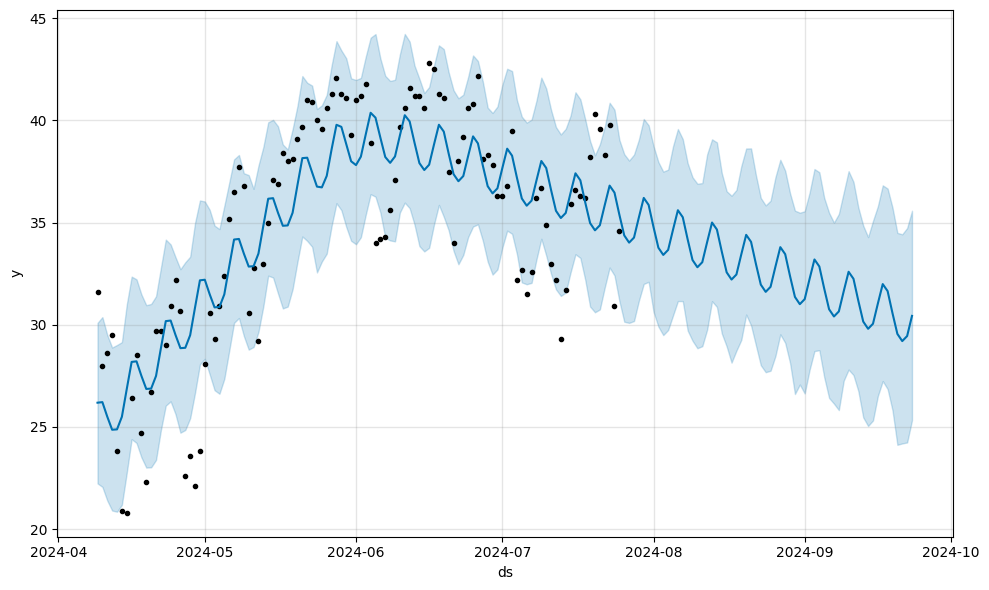

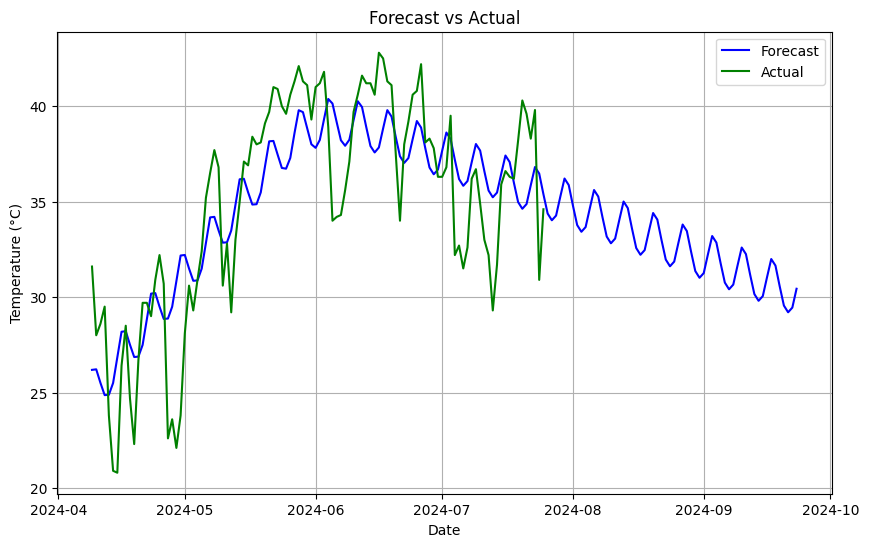

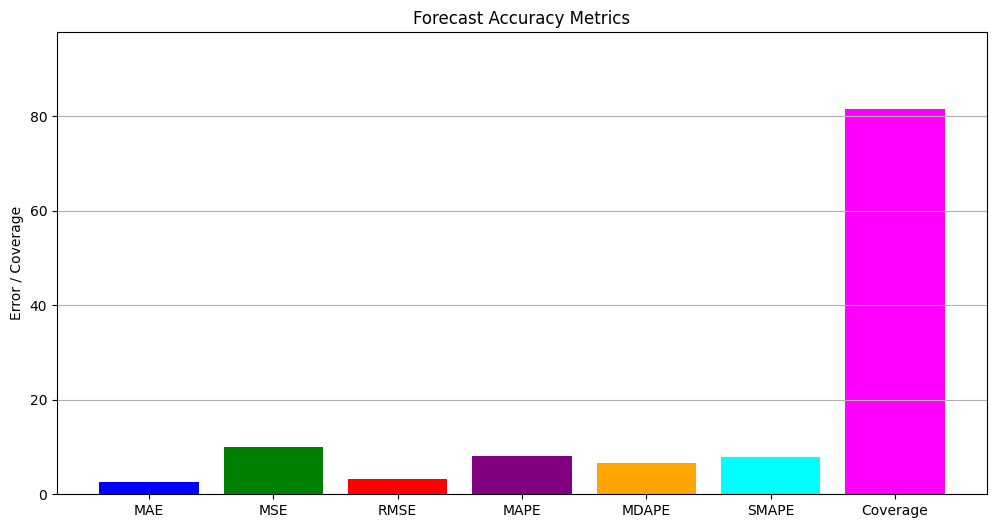

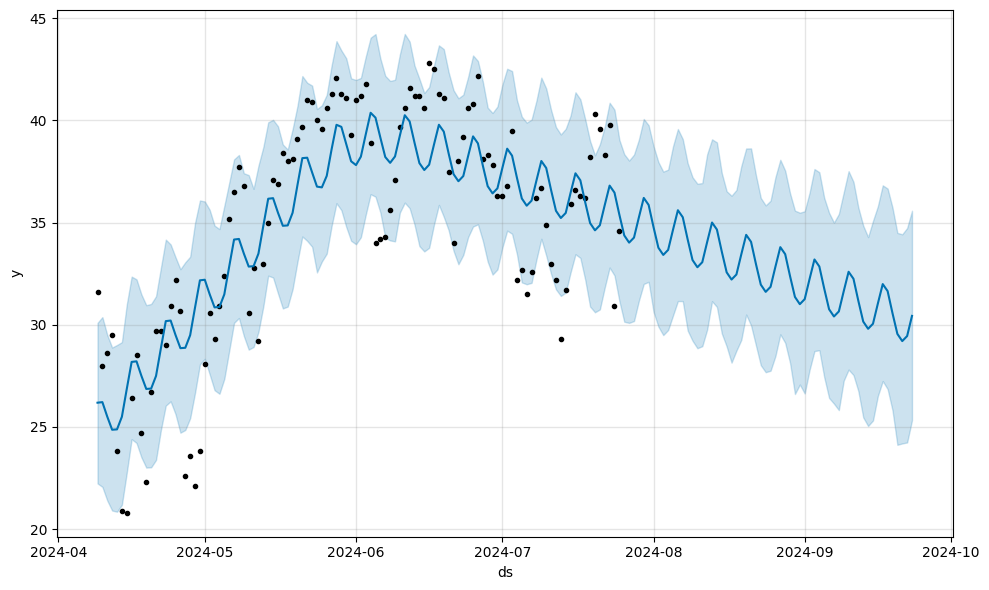

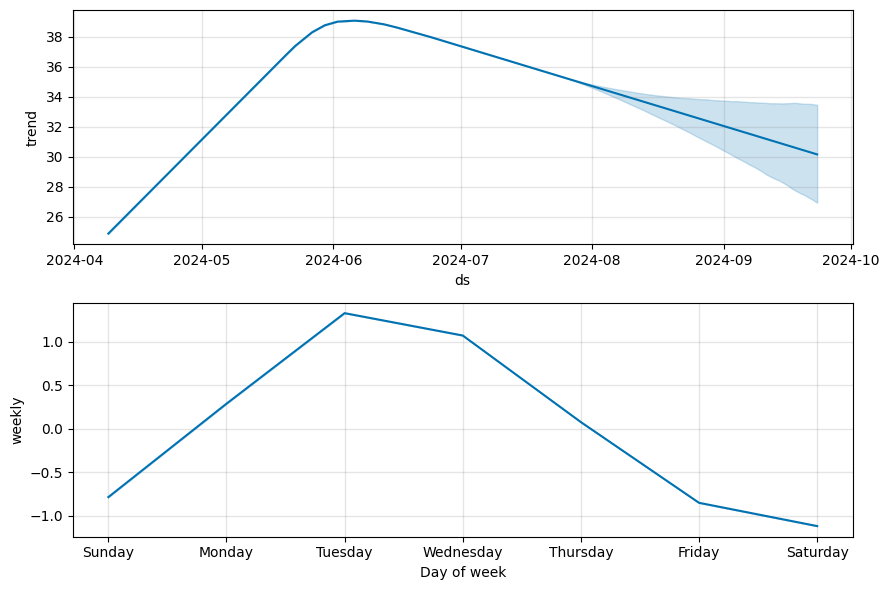

In [ ]:
#for islamabad


import pandas as pd
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np
from prophet import Prophet
import matplotlib.pyplot as plt
from datetime import datetime
from sklearn.metrics import mean_absolute_percentage_error

# Load the data with a different encoding
df = pd.read_csv('/content/8april-22july-open-meteo-33.62N73.12E554m.csv', delimiter=',', encoding='latin1', on_bad_lines='skip')

# Display the first few rows to inspect the data
print(df.head())

# Display the shape of the dataframe to understand its structure
print(df.shape)

# Display the columns to check for any inconsistencies
print(df.columns)

# Step 2: Prepare the Data
# Rename 'time' to 'ds' and select the 'temperature_2m_max (°C)' column as 'y'
df.rename(columns={'time': 'ds', 'temperature_2m_max (Â°C)': 'y'}, inplace=True)
df['ds'] = pd.to_datetime(df['ds'], dayfirst=True)  # Convert the 'ds' column to datetime format with dayfirst=True

# Check the prepared data
print(df.head())

# Step 3: Fit the Model
m = Prophet()
m.fit(df[['ds', 'y']])

# Step 4: Make a Future DataFrame
future = m.make_future_dataframe(periods=60)  # Forecast for the next 60 days

# Step 5: Predict the Future
forecast = m.predict(future)

# Step 6: Plot the Forecast
fig = m.plot(forecast)
fig.show()

# Save the forecast results to a CSV file
forecast[['ds', 'yhat']].to_csv('/content/60days8april-dec24nextforecast_results.csv', index=False)

# Print a message to indicate the file has been saved
print("Forecast results have been saved to '/content/60days8april-dec24nextforecast_results.csv'")

# Calculate metrics (using only the historical part)
historical_forecast = forecast[forecast['ds'] <= df['ds'].max()]
merged = pd.merge(df, historical_forecast[['ds', 'yhat']], on='ds')

mae = mean_absolute_error(merged['y'], merged['yhat'])
mse = mean_squared_error(merged['y'], merged['yhat'])
rmse = np.sqrt(mse)
mape = mean_absolute_percentage_error(merged['y'], merged['yhat'])
mdape = np.median(np.abs((merged['y'] - merged['yhat']) / merged['y'])) * 100
smape = np.mean(np.abs((merged['y'] - merged['yhat']) / ((np.abs(merged['y']) + np.abs(merged['yhat'])) / 2))) * 100

# Calculate Coverage
prediction_interval = 0.95  # 95% prediction interval
forecast_with_intervals = forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]
merged_with_intervals = pd.merge(df, forecast_with_intervals, on='ds')
coverage = np.mean((merged_with_intervals['y'] >= merged_with_intervals['yhat_lower']) &
                    (merged_with_intervals['y'] <= merged_with_intervals['yhat_upper']))

print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"MAPE: {mape * 100:.2f}%")
print(f"MDAPE: {mdape:.2f}%")
print(f"SMAPE: {smape:.2f}%")
print(f"Coverage: {coverage:.2f}")

# Plotting the forecast and metrics
# Plot the forecast
plt.figure(figsize=(10, 6))
plt.plot(forecast['ds'], forecast['yhat'], label='Forecast', color='blue')
plt.plot(df['ds'], df['y'], label='Actual', color='green')
plt.title('Forecast vs Actual')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.grid(True)
plt.show()

# Plot the metrics
metrics = ['MAE', 'MSE', 'RMSE', 'MAPE', 'MDAPE', 'SMAPE', 'Coverage']
values = [mae, mse, rmse, mape * 100, mdape, smape, coverage * 100]

plt.figure(figsize=(12, 6))
plt.bar(metrics, values, color=['blue', 'green', 'red', 'purple', 'orange', 'cyan', 'magenta'])
plt.title('Forecast Accuracy Metrics')
plt.ylabel('Error / Coverage')
plt.ylim(0, max(values) * 1.2)
plt.grid(axis='y')
plt.show()

fig1 = m.plot(forecast)
fig2 = m.plot_components(forecast)

from prophet.plot import plot_plotly, plot_components_plotly

plot_plotly(m, forecast)
plot_components_plotly(m, forecast)


         time  temperature_2m_max (Â°C)  temperature_2m_min (Â°C)  \
0  28/04/2024                      35.5                      25.8   
1  29/04/2024                      38.4                      26.3   
2  30/04/2024                      38.0                      25.6   
3  01/05/2024                      37.8                      25.5   
4  02/05/2024                      35.3                      25.3   

   apparent_temperature_max (Â°C)  apparent_temperature_min (Â°C)  
0                            39.9                            30.6  
1                            37.9                            30.2  
2                            35.9                            29.0  
3                            36.5                            24.4  
4                            39.7                            28.7  
(108, 5)
Index(['time', 'temperature_2m_max (Â°C)', 'temperature_2m_min (Â°C)',
       'apparent_temperature_max (Â°C)', 'apparent_temperature_min (Â°C)'],
      dtype='object')

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwsbusqa7/cusqrr4b.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwsbusqa7/daw4g1ck.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=64233', 'data', 'file=/tmp/tmpwsbusqa7/cusqrr4b.json', 'init=/tmp/tmpwsbusqa7/daw4g1ck.json', 'output', 'file=/tmp/tmpwsbusqa7/prophet_model4jgzkb00/prophet_model-20240729092658.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
09:26:58 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
09:26:58 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Forecast results have been saved to '/content/karachi60days8april-dec24nextforecast_results.csv'
MAE: 0.9927126562381461
MSE: 1.700878089265814
RMSE: 1.304177169431291
MAPE: 2.84%
MDAPE: 2.22%
SMAPE: 2.85%
Coverage: 0.81


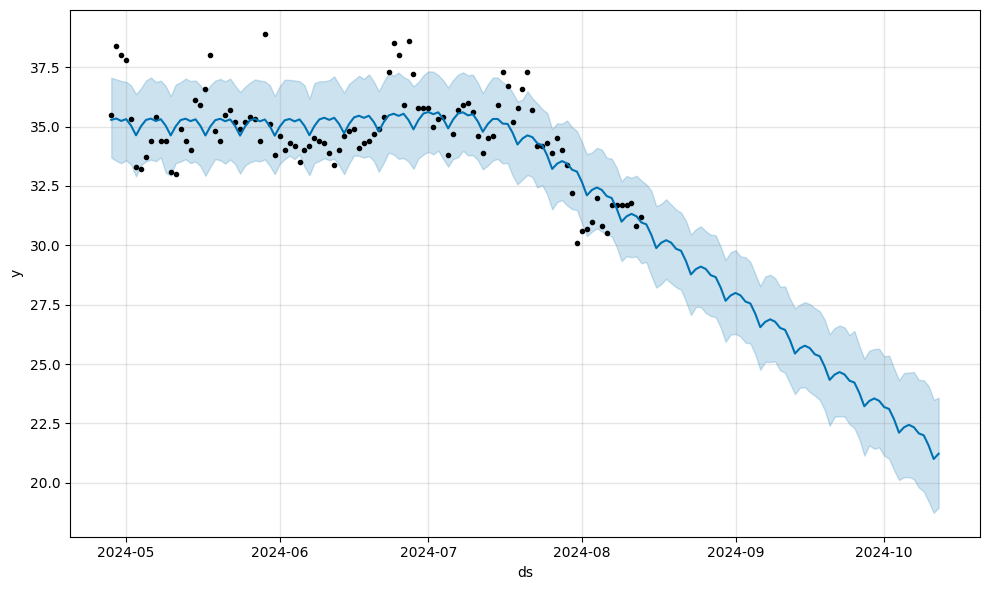

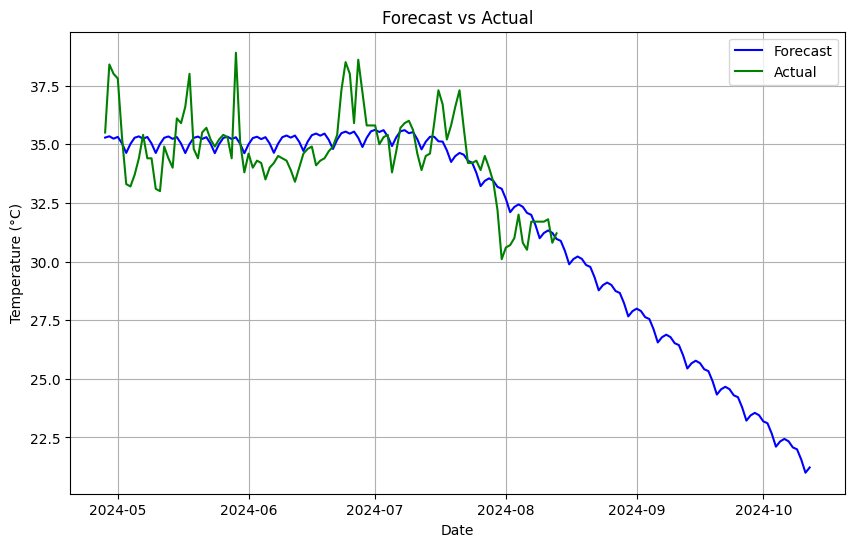

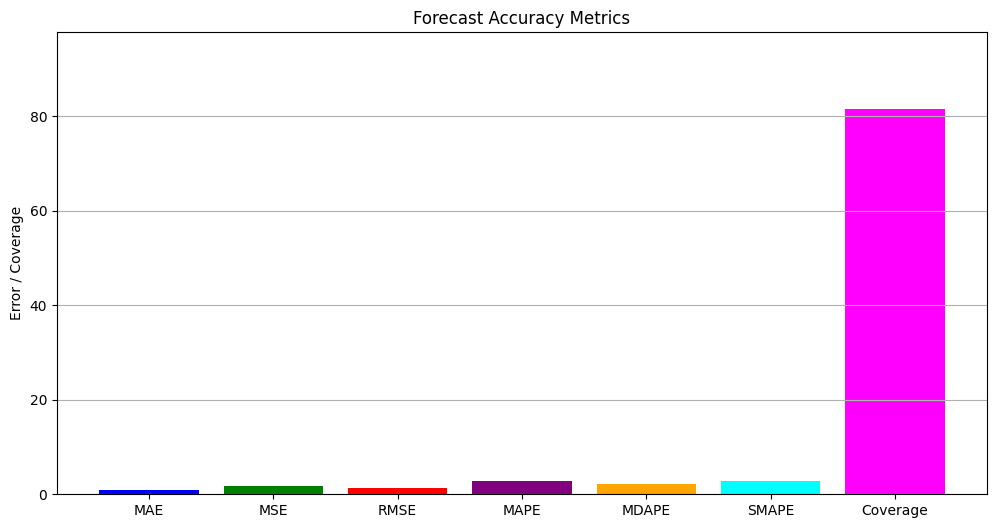

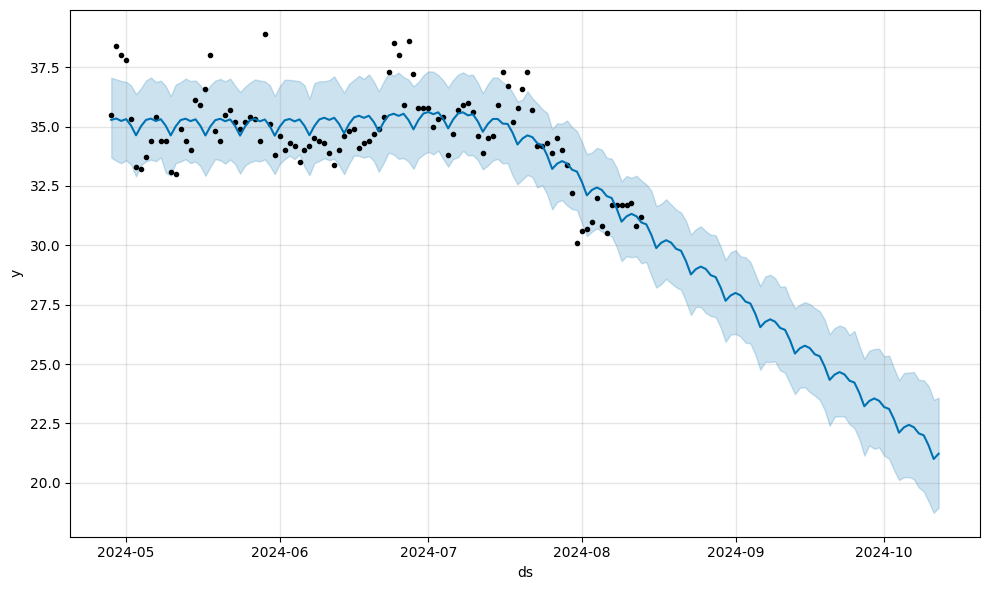

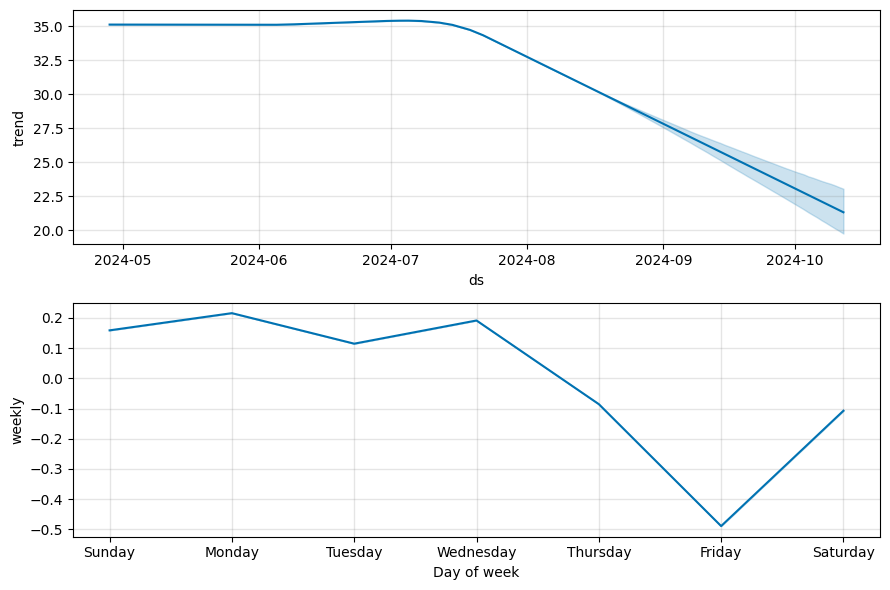

In [4]:
#for karachi


import pandas as pd
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np
from prophet import Prophet
import matplotlib.pyplot as plt
from datetime import datetime
from sklearn.metrics import mean_absolute_percentage_error

# Load the data with a different encoding
df = pd.read_csv('/content/Karachi -24.88N67.00E10m.csv', delimiter=',', encoding='latin1', on_bad_lines='skip')

# Display the first few rows to inspect the data
print(df.head())

# Display the shape of the dataframe to understand its structure
print(df.shape)

# Display the columns to check for any inconsistencies
print(df.columns)

# Step 2: Prepare the Data
# Rename 'time' to 'ds' and select the 'temperature_2m_max (°C)' column as 'y'
df.rename(columns={'time': 'ds', 'temperature_2m_max (Â°C)': 'y'}, inplace=True)
df['ds'] = pd.to_datetime(df['ds'], dayfirst=True)  # Convert the 'ds' column to datetime format with dayfirst=True

# Check the prepared data
print(df.head())

# Step 3: Fit the Model
m = Prophet()
m.fit(df[['ds', 'y']])

# Step 4: Make a Future DataFrame
future = m.make_future_dataframe(periods=60)  # Forecast for the next 60 days

# Step 5: Predict the Future
forecast = m.predict(future)

# Step 6: Plot the Forecast
fig = m.plot(forecast)
fig.show()

# Save the forecast results to a CSV file
forecast[['ds', 'yhat']].to_csv('/content/karachi60days8april-dec24nextforecast_results.csv', index=False)

# Print a message to indicate the file has been saved
print("Forecast results have been saved to '/content/karachi60days8april-dec24nextforecast_results.csv'")

# Calculate metrics (using only the historical part)
historical_forecast = forecast[forecast['ds'] <= df['ds'].max()]
merged = pd.merge(df, historical_forecast[['ds', 'yhat']], on='ds')

mae = mean_absolute_error(merged['y'], merged['yhat'])
mse = mean_squared_error(merged['y'], merged['yhat'])
rmse = np.sqrt(mse)
mape = mean_absolute_percentage_error(merged['y'], merged['yhat'])
mdape = np.median(np.abs((merged['y'] - merged['yhat']) / merged['y'])) * 100
smape = np.mean(np.abs((merged['y'] - merged['yhat']) / ((np.abs(merged['y']) + np.abs(merged['yhat'])) / 2))) * 100

# Calculate Coverage
prediction_interval = 0.95  # 95% prediction interval
forecast_with_intervals = forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]
merged_with_intervals = pd.merge(df, forecast_with_intervals, on='ds')
coverage = np.mean((merged_with_intervals['y'] >= merged_with_intervals['yhat_lower']) &
                    (merged_with_intervals['y'] <= merged_with_intervals['yhat_upper']))

print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"MAPE: {mape * 100:.2f}%")
print(f"MDAPE: {mdape:.2f}%")
print(f"SMAPE: {smape:.2f}%")
print(f"Coverage: {coverage:.2f}")

# Plotting the forecast and metrics
# Plot the forecast
plt.figure(figsize=(10, 6))
plt.plot(forecast['ds'], forecast['yhat'], label='Forecast', color='blue')
plt.plot(df['ds'], df['y'], label='Actual', color='green')
plt.title('Forecast vs Actual')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.grid(True)
plt.show()

# Plot the metrics
metrics = ['MAE', 'MSE', 'RMSE', 'MAPE', 'MDAPE', 'SMAPE', 'Coverage']
values = [mae, mse, rmse, mape * 100, mdape, smape, coverage * 100]

plt.figure(figsize=(12, 6))
plt.bar(metrics, values, color=['blue', 'green', 'red', 'purple', 'orange', 'cyan', 'magenta'])
plt.title('Forecast Accuracy Metrics')
plt.ylabel('Error / Coverage')
plt.ylim(0, max(values) * 1.2)
plt.grid(axis='y')
plt.show()

fig1 = m.plot(forecast)
fig2 = m.plot_components(forecast)

from prophet.plot import plot_plotly, plot_components_plotly

plot_plotly(m, forecast)
plot_components_plotly(m, forecast)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwsbusqa7/rz_7w3et.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwsbusqa7/wmmw277l.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=7805', 'data', 'file=/tmp/tmpwsbusqa7/rz_7w3et.json', 'init=/tmp/tmpwsbusqa7/wmmw277l.json', 'output', 'file=/tmp/tmpwsbusqa7/prophet_model3iy4otld/prophet_model-20240729095754.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
09:57:54 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
09:57:54 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


         time  temperature_2m_max (Â°C)  temperature_2m_min (Â°C)  \
0  28/04/2024                      33.4                      20.7   
1  29/04/2024                      31.6                      19.2   
2  30/04/2024                      31.0                      16.8   
3  01/05/2024                      29.2                      16.6   
4  02/05/2024                      33.8                      19.0   

   apparent_temperature_max (Â°C)  apparent_temperature_min (Â°C)  
0                            36.4                            21.3  
1                            32.8                            19.7  
2                            31.2                            17.6  
3                            28.7                            16.9  
4                            34.2                            19.3  
(108, 5)
Index(['time', 'temperature_2m_max (Â°C)', 'temperature_2m_min (Â°C)',
       'apparent_temperature_max (Â°C)', 'apparent_temperature_min (Â°C)'],
      dtype='object')

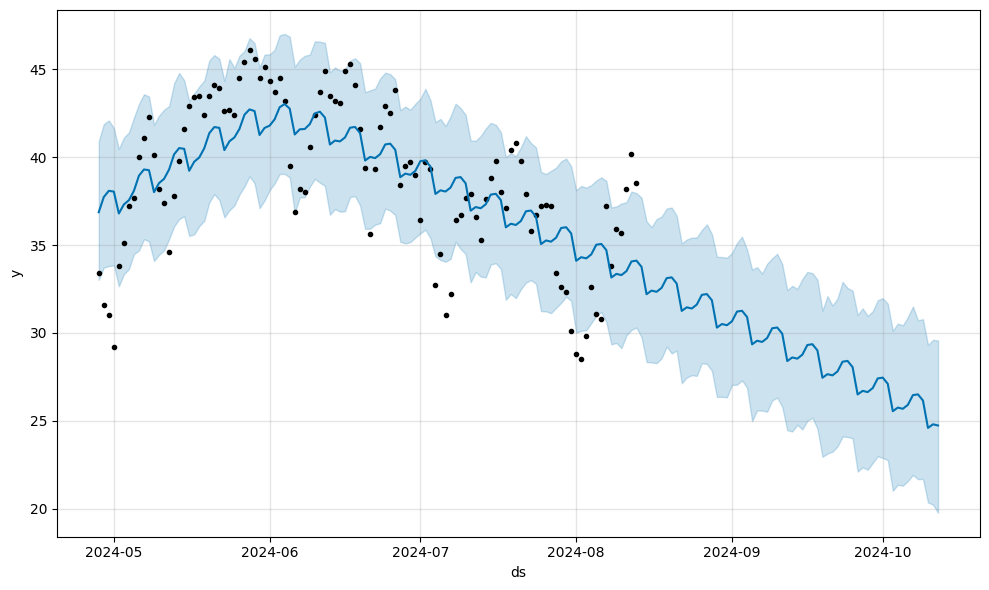

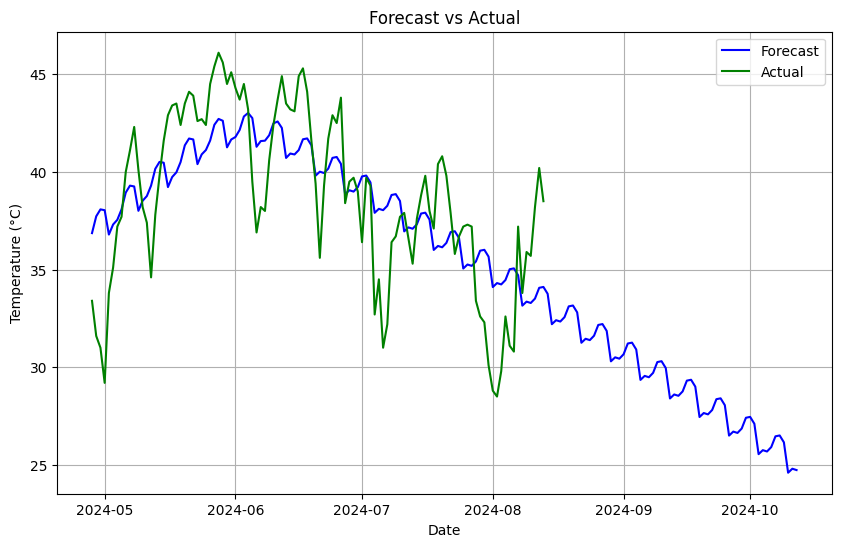

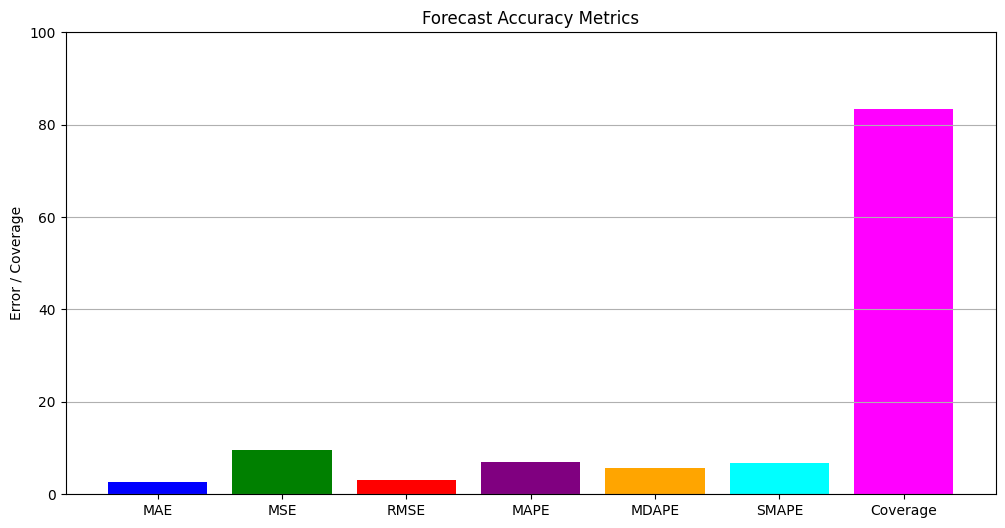

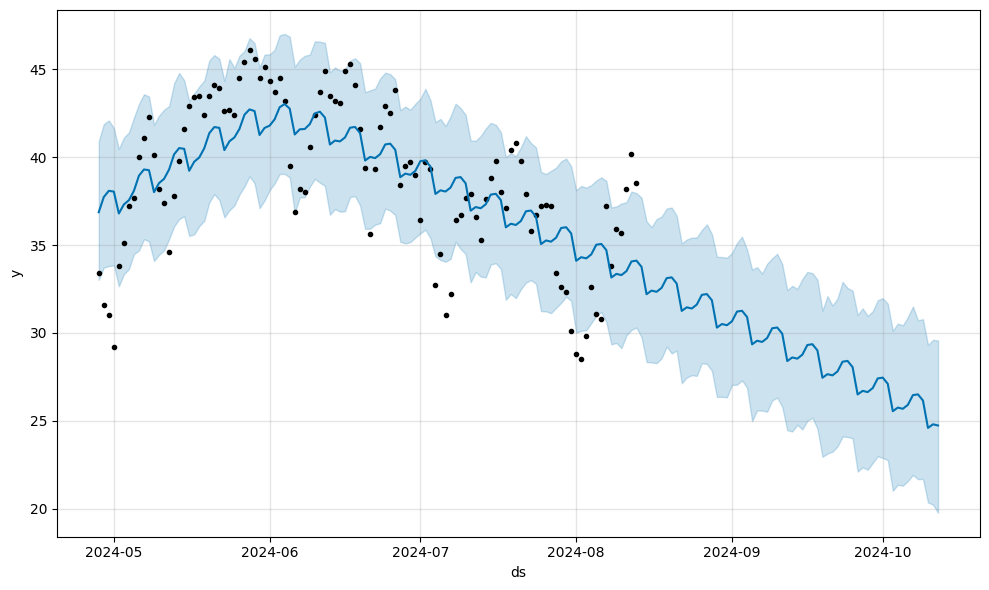

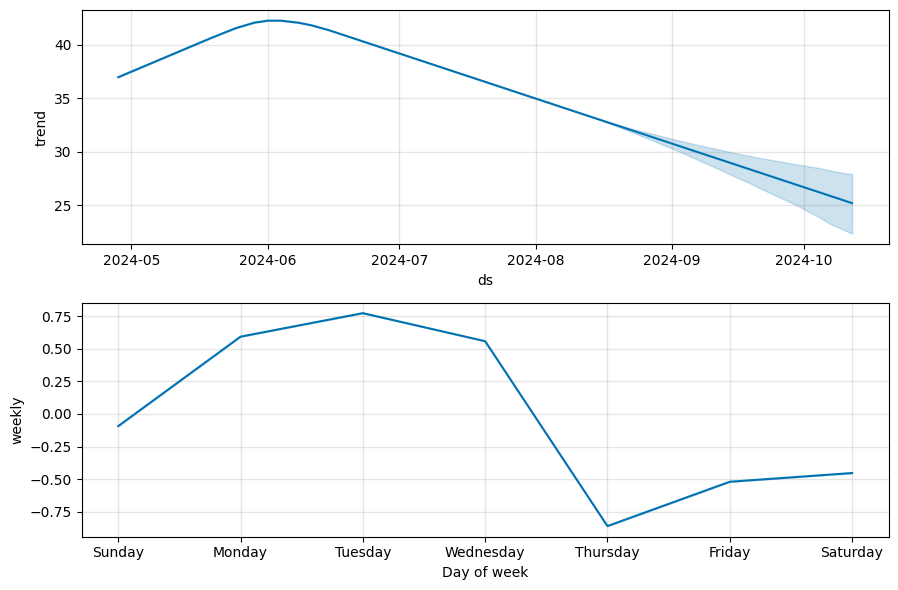

In [9]:
#for lahore


import pandas as pd
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np
from prophet import Prophet
import matplotlib.pyplot as plt
from datetime import datetime
from sklearn.metrics import mean_absolute_percentage_error

# Load the data with a different encoding
df = pd.read_csv('/content/Lahore -31.50N74.38E217m.csv', delimiter=',', encoding='latin1', on_bad_lines='skip')

# Display the first few rows to inspect the data
print(df.head())

# Display the shape of the dataframe to understand its structure
print(df.shape)

# Display the columns to check for any inconsistencies
print(df.columns)

# Step 2: Prepare the Data
# Rename 'time' to 'ds' and select the 'temperature_2m_max (°C)' column as 'y'
df.rename(columns={'time': 'ds', 'temperature_2m_max (Â°C)': 'y'}, inplace=True)
df['ds'] = pd.to_datetime(df['ds'], dayfirst=True)  # Convert the 'ds' column to datetime format with dayfirst=True

# Check the prepared data
print(df.head())

# Step 3: Fit the Model
m = Prophet()
m.fit(df[['ds', 'y']])

# Step 4: Make a Future DataFrame
future = m.make_future_dataframe(periods=60)  # Forecast for the next 60 days

# Step 5: Predict the Future
forecast = m.predict(future)

# Step 6: Plot the Forecast
fig = m.plot(forecast)
fig.show()

# Save the forecast results to a CSV file
forecast[['ds', 'yhat']].to_csv('/content/lahore60days8april-dec24nextforecast_results.csv', index=False)

# Print a message to indicate the file has been saved
print("Forecast results have been saved to '/content/lahore60days8april-dec24nextforecast_results.csv'")

# Calculate metrics (using only the historical part)
historical_forecast = forecast[forecast['ds'] <= df['ds'].max()]
merged = pd.merge(df, historical_forecast[['ds', 'yhat']], on='ds')

mae = mean_absolute_error(merged['y'], merged['yhat'])
mse = mean_squared_error(merged['y'], merged['yhat'])
rmse = np.sqrt(mse)
mape = mean_absolute_percentage_error(merged['y'], merged['yhat'])
mdape = np.median(np.abs((merged['y'] - merged['yhat']) / merged['y'])) * 100
smape = np.mean(np.abs((merged['y'] - merged['yhat']) / ((np.abs(merged['y']) + np.abs(merged['yhat'])) / 2))) * 100

# Calculate Coverage
prediction_interval = 0.95  # 95% prediction interval
forecast_with_intervals = forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]
merged_with_intervals = pd.merge(df, forecast_with_intervals, on='ds')
coverage = np.mean((merged_with_intervals['y'] >= merged_with_intervals['yhat_lower']) &
                    (merged_with_intervals['y'] <= merged_with_intervals['yhat_upper']))

print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"MAPE: {mape * 100:.2f}%")
print(f"MDAPE: {mdape:.2f}%")
print(f"SMAPE: {smape:.2f}%")
print(f"Coverage: {coverage:.2f}")

# Plotting the forecast and metrics
# Plot the forecast
plt.figure(figsize=(10, 6))
plt.plot(forecast['ds'], forecast['yhat'], label='Forecast', color='blue')
plt.plot(df['ds'], df['y'], label='Actual', color='green')
plt.title('Forecast vs Actual')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.grid(True)
plt.show()

# Plot the metrics
metrics = ['MAE', 'MSE', 'RMSE', 'MAPE', 'MDAPE', 'SMAPE', 'Coverage']
values = [mae, mse, rmse, mape * 100, mdape, smape, coverage * 100]

plt.figure(figsize=(12, 6))
plt.bar(metrics, values, color=['blue', 'green', 'red', 'purple', 'orange', 'cyan', 'magenta'])
plt.title('Forecast Accuracy Metrics')
plt.ylabel('Error / Coverage')
plt.ylim(0, max(values) * 1.2)
plt.grid(axis='y')
plt.show()

fig1 = m.plot(forecast)
fig2 = m.plot_components(forecast)

from prophet.plot import plot_plotly, plot_components_plotly

plot_plotly(m, forecast)
plot_components_plotly(m, forecast)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwsbusqa7/h_7ri48k.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwsbusqa7/r_c3yit8.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=92013', 'data', 'file=/tmp/tmpwsbusqa7/h_7ri48k.json', 'init=/tmp/tmpwsbusqa7/r_c3yit8.json', 'output', 'file=/tmp/tmpwsbusqa7/prophet_modelvtu8mrv8/prophet_model-20240729095731.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
09:57:31 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
09:57:31 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


         time  temperature_2m_max (Â°C)  temperature_2m_min (Â°C)  \
0  28/04/2024                      29.5                      16.0   
1  29/04/2024                      28.6                      16.1   
2  30/04/2024                      28.4                      17.5   
3  01/05/2024                      29.8                      17.5   
4  02/05/2024                      31.1                      17.5   

   apparent_temperature_max (Â°C)  apparent_temperature_min (Â°C)  
0                            28.5                            15.9  
1                            28.1                            16.1  
2                            28.1                            17.6  
3                            30.0                            17.7  
4                            30.1                            18.4  
(108, 5)
Index(['time', 'temperature_2m_max (Â°C)', 'temperature_2m_min (Â°C)',
       'apparent_temperature_max (Â°C)', 'apparent_temperature_min (Â°C)'],
      dtype='object')

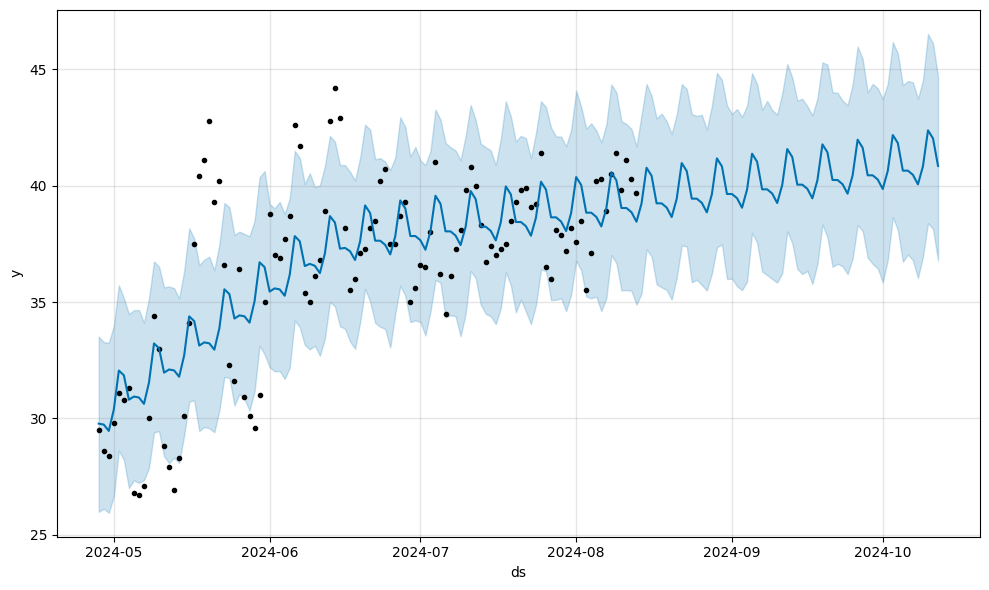

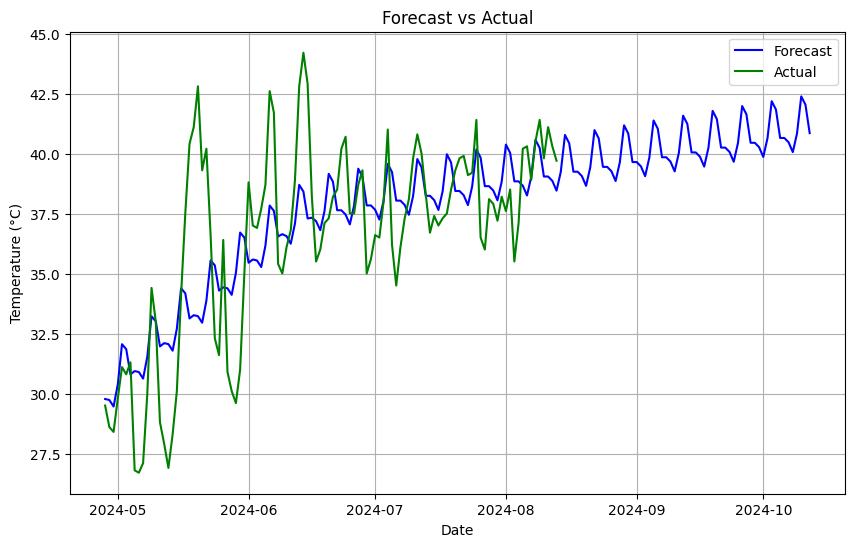

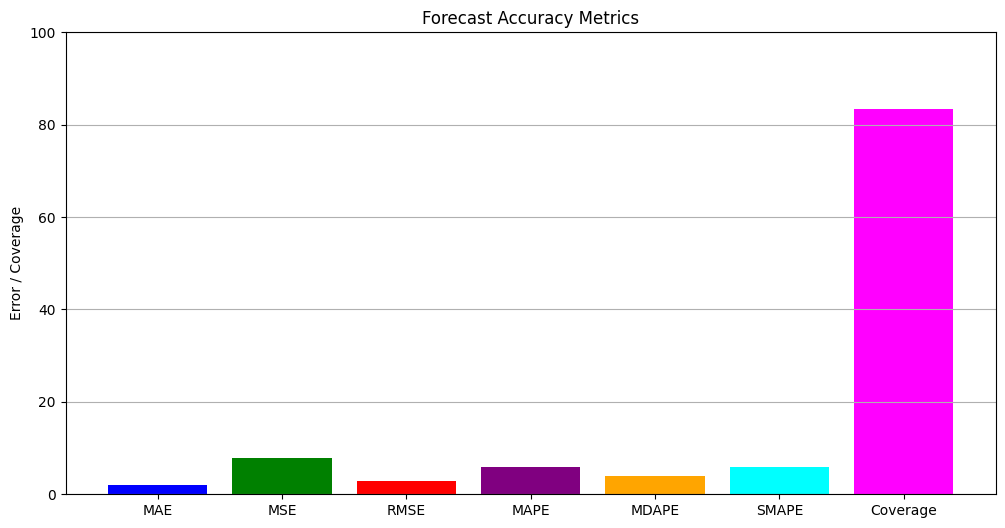

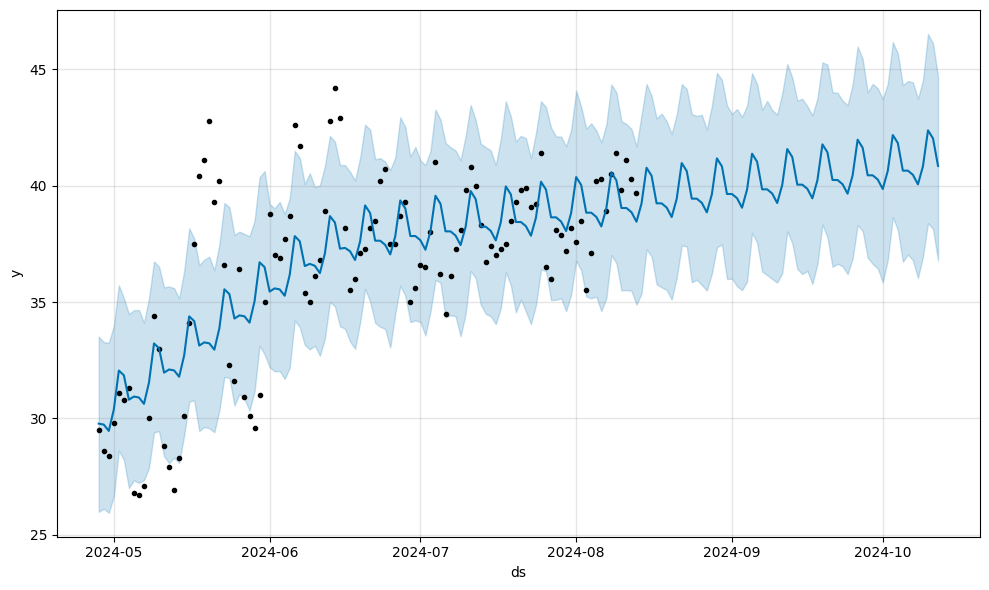

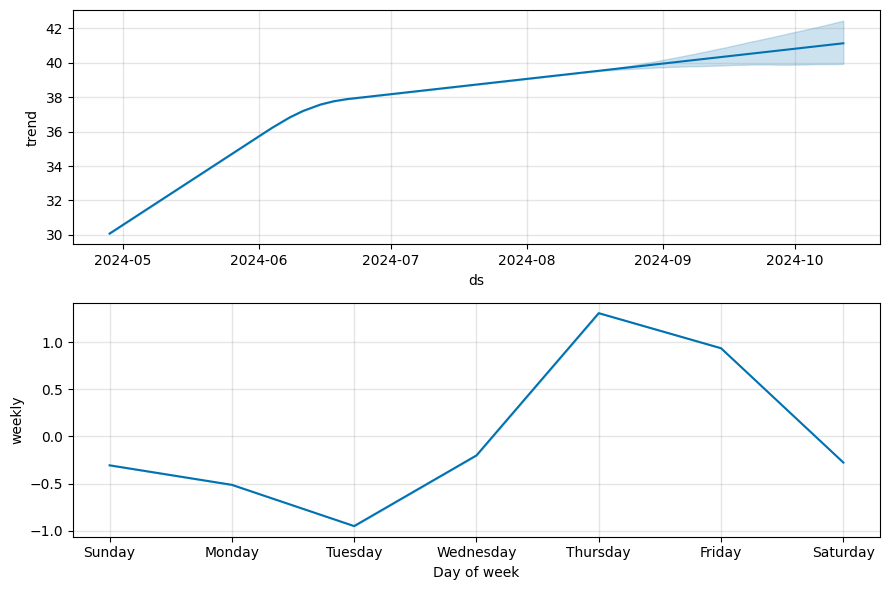

In [8]:
#for quetta


import pandas as pd
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np
from prophet import Prophet
import matplotlib.pyplot as plt
from datetime import datetime
from sklearn.metrics import mean_absolute_percentage_error

# Load the data with a different encoding
df = pd.read_csv('/content/Quetta-30.25N30.25E18m.csv', delimiter=',', encoding='latin1', on_bad_lines='skip')

# Display the first few rows to inspect the data
print(df.head())

# Display the shape of the dataframe to understand its structure
print(df.shape)

# Display the columns to check for any inconsistencies
print(df.columns)

# Step 2: Prepare the Data
# Rename 'time' to 'ds' and select the 'temperature_2m_max (°C)' column as 'y'
df.rename(columns={'time': 'ds', 'temperature_2m_max (Â°C)': 'y'}, inplace=True)
df['ds'] = pd.to_datetime(df['ds'], dayfirst=True)  # Convert the 'ds' column to datetime format with dayfirst=True

# Check the prepared data
print(df.head())

# Step 3: Fit the Model
m = Prophet()
m.fit(df[['ds', 'y']])

# Step 4: Make a Future DataFrame
future = m.make_future_dataframe(periods=60)  # Forecast for the next 60 days

# Step 5: Predict the Future
forecast = m.predict(future)

# Step 6: Plot the Forecast
fig = m.plot(forecast)
fig.show()

# Save the forecast results to a CSV file
forecast[['ds', 'yhat']].to_csv('/content/quetta60days8april-dec24nextforecast_results.csv', index=False)

# Print a message to indicate the file has been saved
print("Forecast results have been saved to '/content/quetta60days8april-dec24nextforecast_results.csv'")

# Calculate metrics (using only the historical part)
historical_forecast = forecast[forecast['ds'] <= df['ds'].max()]
merged = pd.merge(df, historical_forecast[['ds', 'yhat']], on='ds')

mae = mean_absolute_error(merged['y'], merged['yhat'])
mse = mean_squared_error(merged['y'], merged['yhat'])
rmse = np.sqrt(mse)
mape = mean_absolute_percentage_error(merged['y'], merged['yhat'])
mdape = np.median(np.abs((merged['y'] - merged['yhat']) / merged['y'])) * 100
smape = np.mean(np.abs((merged['y'] - merged['yhat']) / ((np.abs(merged['y']) + np.abs(merged['yhat'])) / 2))) * 100

# Calculate Coverage
prediction_interval = 0.95  # 95% prediction interval
forecast_with_intervals = forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]
merged_with_intervals = pd.merge(df, forecast_with_intervals, on='ds')
coverage = np.mean((merged_with_intervals['y'] >= merged_with_intervals['yhat_lower']) &
                    (merged_with_intervals['y'] <= merged_with_intervals['yhat_upper']))

print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"MAPE: {mape * 100:.2f}%")
print(f"MDAPE: {mdape:.2f}%")
print(f"SMAPE: {smape:.2f}%")
print(f"Coverage: {coverage:.2f}")

# Plotting the forecast and metrics
# Plot the forecast
plt.figure(figsize=(10, 6))
plt.plot(forecast['ds'], forecast['yhat'], label='Forecast', color='blue')
plt.plot(df['ds'], df['y'], label='Actual', color='green')
plt.title('Forecast vs Actual')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.grid(True)
plt.show()

# Plot the metrics
metrics = ['MAE', 'MSE', 'RMSE', 'MAPE', 'MDAPE', 'SMAPE', 'Coverage']
values = [mae, mse, rmse, mape * 100, mdape, smape, coverage * 100]

plt.figure(figsize=(12, 6))
plt.bar(metrics, values, color=['blue', 'green', 'red', 'purple', 'orange', 'cyan', 'magenta'])
plt.title('Forecast Accuracy Metrics')
plt.ylabel('Error / Coverage')
plt.ylim(0, max(values) * 1.2)
plt.grid(axis='y')
plt.show()

fig1 = m.plot(forecast)
fig2 = m.plot_components(forecast)

from prophet.plot import plot_plotly, plot_components_plotly

plot_plotly(m, forecast)
plot_components_plotly(m, forecast)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwsbusqa7/van8us1z.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwsbusqa7/m2wquc4k.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=57142', 'data', 'file=/tmp/tmpwsbusqa7/van8us1z.json', 'init=/tmp/tmpwsbusqa7/m2wquc4k.json', 'output', 'file=/tmp/tmpwsbusqa7/prophet_model37tpjn3f/prophet_model-20240729095952.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
09:59:52 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
09:59:52 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


         time  temperature_2m_max (Â°C)  temperature_2m_min (Â°C)  \
0  28/04/2024                      20.9                      16.9   
1  29/04/2024                      21.8                      15.1   
2  30/04/2024                      23.1                      13.0   
3  01/05/2024                      30.0                      10.8   
4  02/05/2024                      31.7                      14.8   

   apparent_temperature_max (Â°C)  apparent_temperature_min (Â°C)  
0                            22.2                            17.6  
1                            22.6                            15.7  
2                            20.5                            12.7  
3                            30.2                             9.4  
4                            34.1                            14.6  
(108, 5)
Index(['time', 'temperature_2m_max (Â°C)', 'temperature_2m_min (Â°C)',
       'apparent_temperature_max (Â°C)', 'apparent_temperature_min (Â°C)'],
      dtype='object')

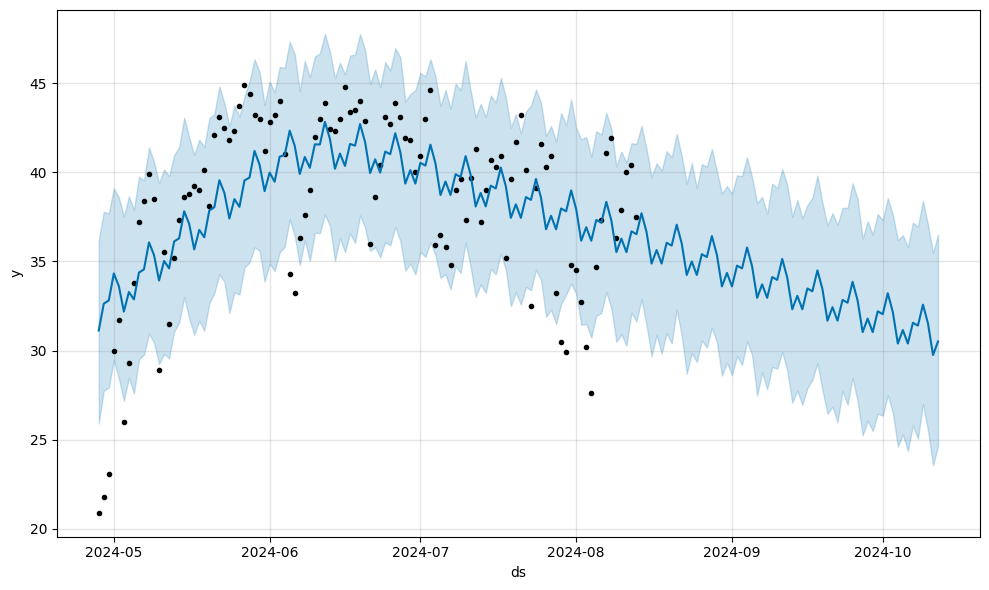

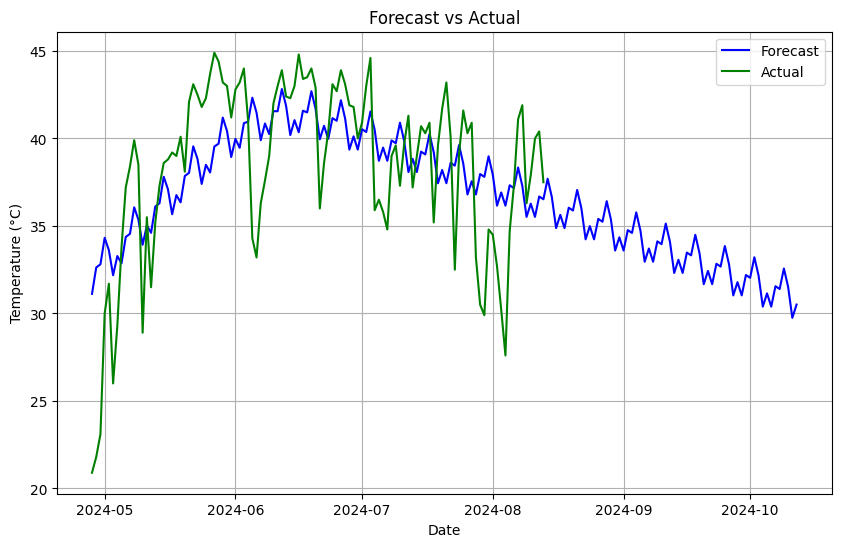

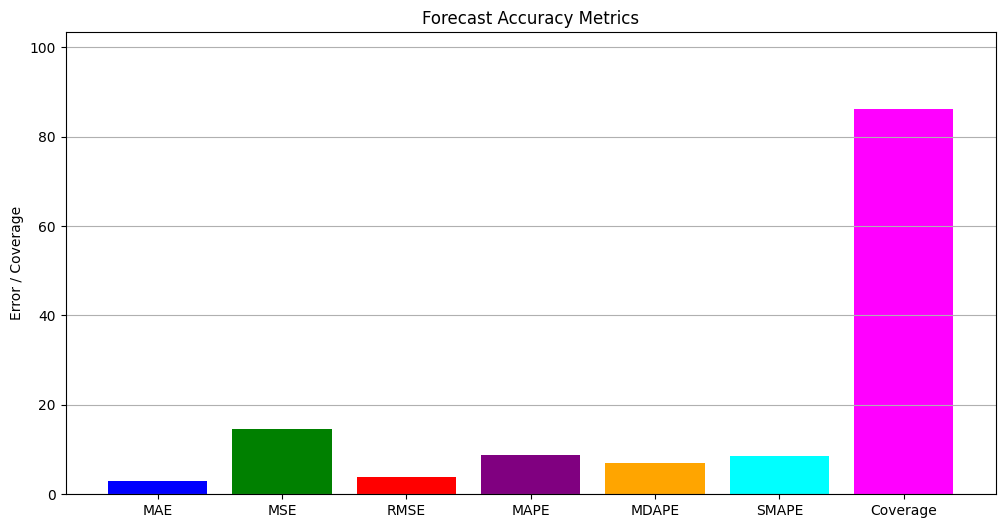

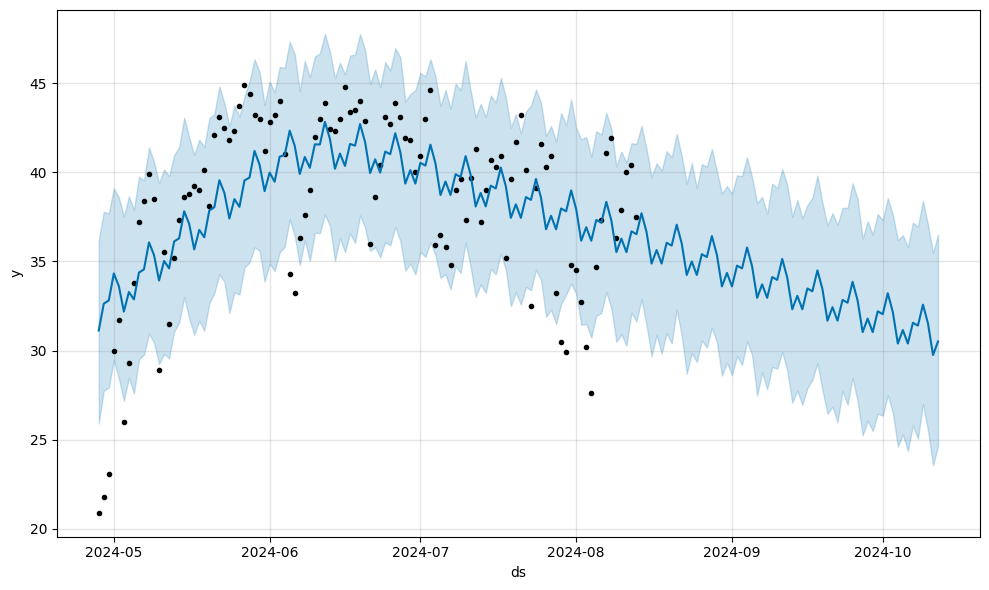

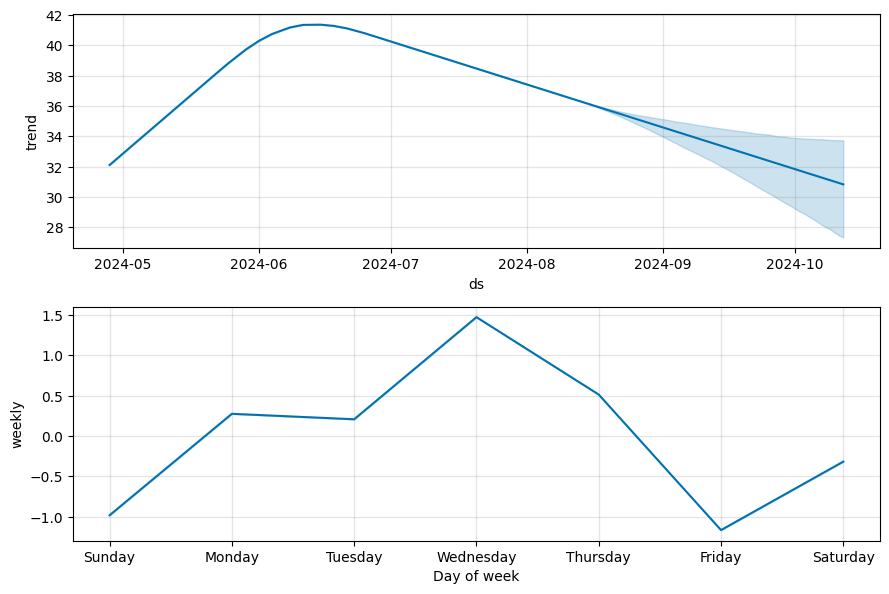

In [10]:
#for peshawar


import pandas as pd
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np
from prophet import Prophet
import matplotlib.pyplot as plt
from datetime import datetime
from sklearn.metrics import mean_absolute_percentage_error

# Load the data with a different encoding
df = pd.read_csv('/content/Peshawar -34.00N71.62E312m.csv', delimiter=',', encoding='latin1', on_bad_lines='skip')

# Display the first few rows to inspect the data
print(df.head())

# Display the shape of the dataframe to understand its structure
print(df.shape)

# Display the columns to check for any inconsistencies
print(df.columns)

# Step 2: Prepare the Data
# Rename 'time' to 'ds' and select the 'temperature_2m_max (°C)' column as 'y'
df.rename(columns={'time': 'ds', 'temperature_2m_max (Â°C)': 'y'}, inplace=True)
df['ds'] = pd.to_datetime(df['ds'], dayfirst=True)  # Convert the 'ds' column to datetime format with dayfirst=True

# Check the prepared data
print(df.head())

# Step 3: Fit the Model
m = Prophet()
m.fit(df[['ds', 'y']])

# Step 4: Make a Future DataFrame
future = m.make_future_dataframe(periods=60)  # Forecast for the next 60 days

# Step 5: Predict the Future
forecast = m.predict(future)

# Step 6: Plot the Forecast
fig = m.plot(forecast)
fig.show()

# Save the forecast results to a CSV file
forecast[['ds', 'yhat']].to_csv('/content/peshawar60days8april-dec24nextforecast_results.csv', index=False)

# Print a message to indicate the file has been saved
print("Forecast results have been saved to '/content/peshawar60days8april-dec24nextforecast_results.csv'")

# Calculate metrics (using only the historical part)
historical_forecast = forecast[forecast['ds'] <= df['ds'].max()]
merged = pd.merge(df, historical_forecast[['ds', 'yhat']], on='ds')

mae = mean_absolute_error(merged['y'], merged['yhat'])
mse = mean_squared_error(merged['y'], merged['yhat'])
rmse = np.sqrt(mse)
mape = mean_absolute_percentage_error(merged['y'], merged['yhat'])
mdape = np.median(np.abs((merged['y'] - merged['yhat']) / merged['y'])) * 100
smape = np.mean(np.abs((merged['y'] - merged['yhat']) / ((np.abs(merged['y']) + np.abs(merged['yhat'])) / 2))) * 100

# Calculate Coverage
prediction_interval = 0.95  # 95% prediction interval
forecast_with_intervals = forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]
merged_with_intervals = pd.merge(df, forecast_with_intervals, on='ds')
coverage = np.mean((merged_with_intervals['y'] >= merged_with_intervals['yhat_lower']) &
                    (merged_with_intervals['y'] <= merged_with_intervals['yhat_upper']))

print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"MAPE: {mape * 100:.2f}%")
print(f"MDAPE: {mdape:.2f}%")
print(f"SMAPE: {smape:.2f}%")
print(f"Coverage: {coverage:.2f}")

# Plotting the forecast and metrics
# Plot the forecast
plt.figure(figsize=(10, 6))
plt.plot(forecast['ds'], forecast['yhat'], label='Forecast', color='blue')
plt.plot(df['ds'], df['y'], label='Actual', color='green')
plt.title('Forecast vs Actual')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.grid(True)
plt.show()

# Plot the metrics
metrics = ['MAE', 'MSE', 'RMSE', 'MAPE', 'MDAPE', 'SMAPE', 'Coverage']
values = [mae, mse, rmse, mape * 100, mdape, smape, coverage * 100]

plt.figure(figsize=(12, 6))
plt.bar(metrics, values, color=['blue', 'green', 'red', 'purple', 'orange', 'cyan', 'magenta'])
plt.title('Forecast Accuracy Metrics')
plt.ylabel('Error / Coverage')
plt.ylim(0, max(values) * 1.2)
plt.grid(axis='y')
plt.show()

fig1 = m.plot(forecast)
fig2 = m.plot_components(forecast)

from prophet.plot import plot_plotly, plot_components_plotly

plot_plotly(m, forecast)
plot_components_plotly(m, forecast)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwsbusqa7/jv3uau5z.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwsbusqa7/z0e9ponw.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=16946', 'data', 'file=/tmp/tmpwsbusqa7/jv3uau5z.json', 'init=/tmp/tmpwsbusqa7/z0e9ponw.json', 'output', 'file=/tmp/tmpwsbusqa7/prophet_modelf5q__jym/prophet_model-20240729100140.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
10:01:40 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
10:01:40 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


         time  temperature_2m_max (Â°C)  temperature_2m_min (Â°C)  \
0  28/04/2024                      21.0                      11.2   
1  29/04/2024                      13.8                       9.0   
2  30/04/2024                      19.4                       7.5   
3  01/05/2024                      21.1                       8.0   
4  02/05/2024                      24.9                      12.3   

   apparent_temperature_max (Â°C)  apparent_temperature_min (Â°C)  
0                            21.2                             9.0  
1                            11.7                             6.5  
2                            18.2                             5.3  
3                            19.7                             5.3  
4                            23.6                             9.8  
(108, 5)
Index(['time', 'temperature_2m_max (Â°C)', 'temperature_2m_min (Â°C)',
       'apparent_temperature_max (Â°C)', 'apparent_temperature_min (Â°C)'],
      dtype='object')

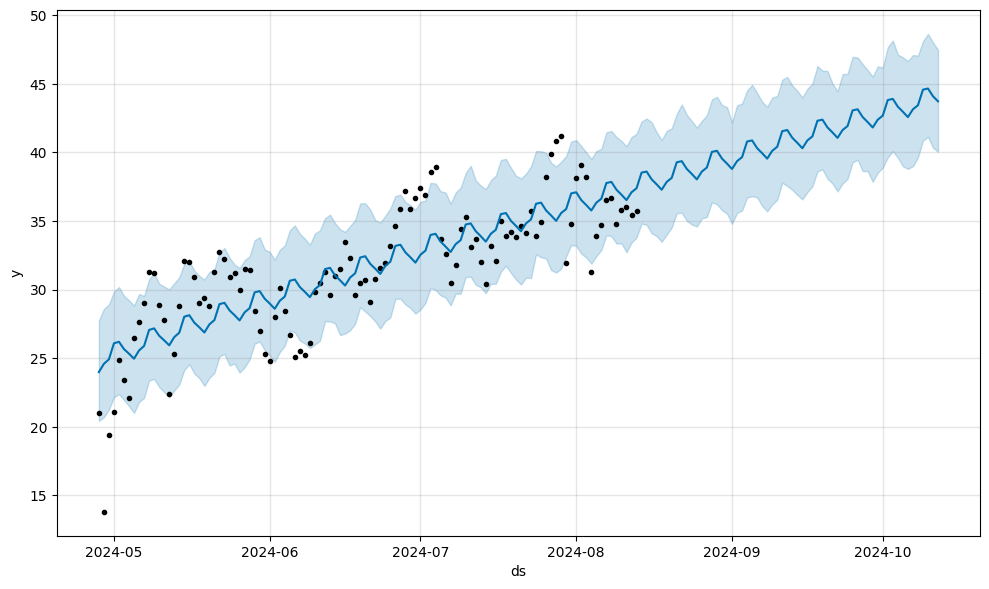

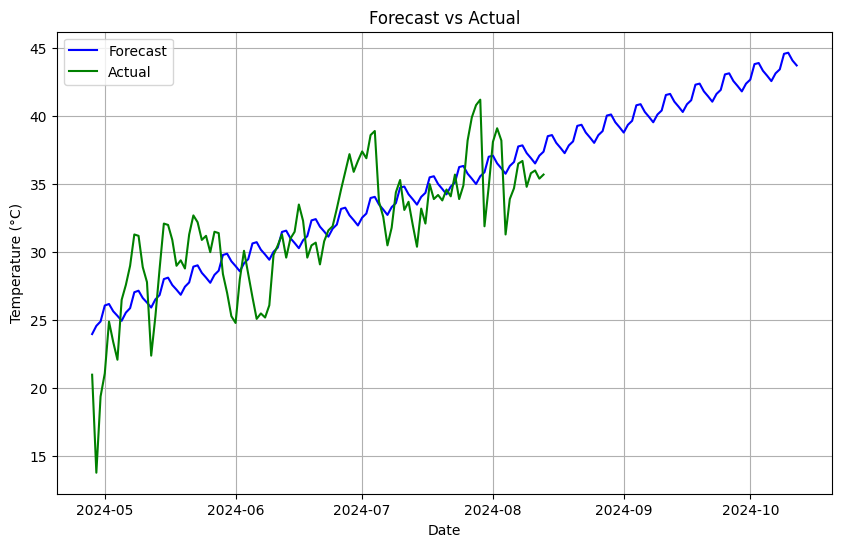

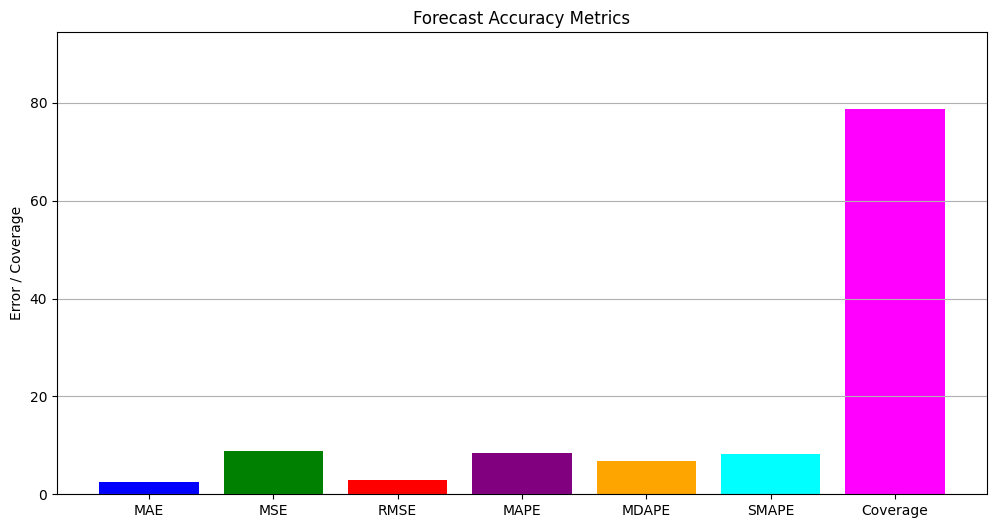

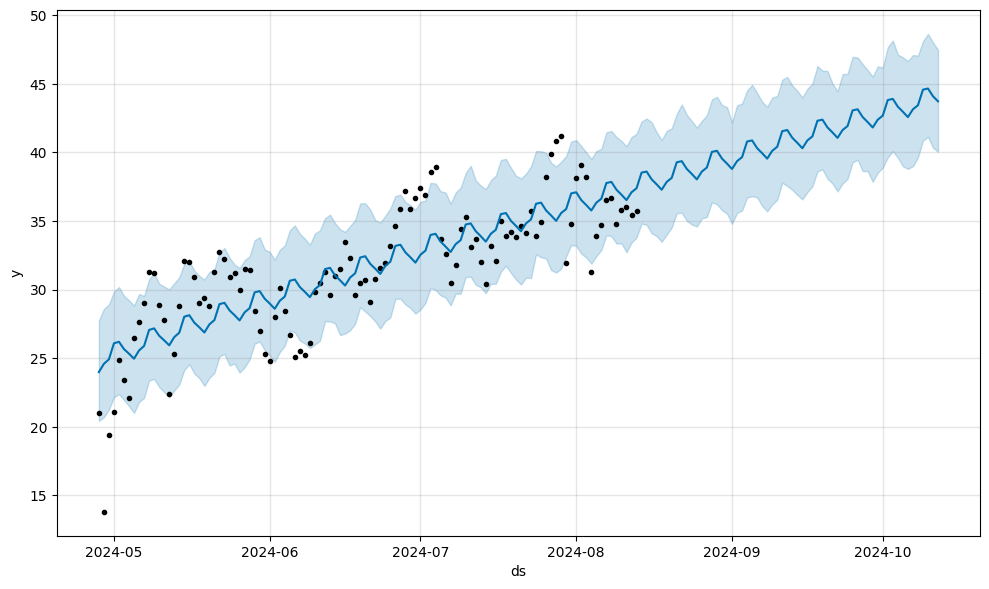

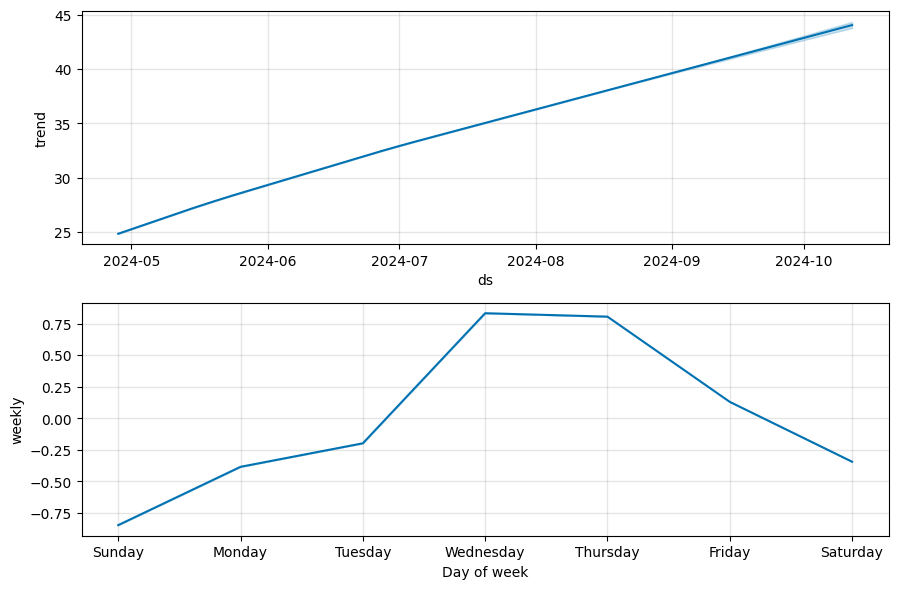

In [11]:
#for gilgit


import pandas as pd
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np
from prophet import Prophet
import matplotlib.pyplot as plt
from datetime import datetime
from sklearn.metrics import mean_absolute_percentage_error

# Load the data with a different encoding
df = pd.read_csv('/content/Gilgit-35.75N74.62E1616m.csv', delimiter=',', encoding='latin1', on_bad_lines='skip')

# Display the first few rows to inspect the data
print(df.head())

# Display the shape of the dataframe to understand its structure
print(df.shape)

# Display the columns to check for any inconsistencies
print(df.columns)

# Step 2: Prepare the Data
# Rename 'time' to 'ds' and select the 'temperature_2m_max (°C)' column as 'y'
df.rename(columns={'time': 'ds', 'temperature_2m_max (Â°C)': 'y'}, inplace=True)
df['ds'] = pd.to_datetime(df['ds'], dayfirst=True)  # Convert the 'ds' column to datetime format with dayfirst=True

# Check the prepared data
print(df.head())

# Step 3: Fit the Model
m = Prophet()
m.fit(df[['ds', 'y']])

# Step 4: Make a Future DataFrame
future = m.make_future_dataframe(periods=60)  # Forecast for the next 60 days

# Step 5: Predict the Future
forecast = m.predict(future)

# Step 6: Plot the Forecast
fig = m.plot(forecast)
fig.show()

# Save the forecast results to a CSV file
forecast[['ds', 'yhat']].to_csv('/content/gilgit60days8april-dec24nextforecast_results.csv', index=False)

# Print a message to indicate the file has been saved
print("Forecast results have been saved to '/content/gilgit60days8april-dec24nextforecast_results.csv'")

# Calculate metrics (using only the historical part)
historical_forecast = forecast[forecast['ds'] <= df['ds'].max()]
merged = pd.merge(df, historical_forecast[['ds', 'yhat']], on='ds')

mae = mean_absolute_error(merged['y'], merged['yhat'])
mse = mean_squared_error(merged['y'], merged['yhat'])
rmse = np.sqrt(mse)
mape = mean_absolute_percentage_error(merged['y'], merged['yhat'])
mdape = np.median(np.abs((merged['y'] - merged['yhat']) / merged['y'])) * 100
smape = np.mean(np.abs((merged['y'] - merged['yhat']) / ((np.abs(merged['y']) + np.abs(merged['yhat'])) / 2))) * 100

# Calculate Coverage
prediction_interval = 0.95  # 95% prediction interval
forecast_with_intervals = forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]
merged_with_intervals = pd.merge(df, forecast_with_intervals, on='ds')
coverage = np.mean((merged_with_intervals['y'] >= merged_with_intervals['yhat_lower']) &
                    (merged_with_intervals['y'] <= merged_with_intervals['yhat_upper']))

print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"MAPE: {mape * 100:.2f}%")
print(f"MDAPE: {mdape:.2f}%")
print(f"SMAPE: {smape:.2f}%")
print(f"Coverage: {coverage:.2f}")

# Plotting the forecast and metrics
# Plot the forecast
plt.figure(figsize=(10, 6))
plt.plot(forecast['ds'], forecast['yhat'], label='Forecast', color='blue')
plt.plot(df['ds'], df['y'], label='Actual', color='green')
plt.title('Forecast vs Actual')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.grid(True)
plt.show()

# Plot the metrics
metrics = ['MAE', 'MSE', 'RMSE', 'MAPE', 'MDAPE', 'SMAPE', 'Coverage']
values = [mae, mse, rmse, mape * 100, mdape, smape, coverage * 100]

plt.figure(figsize=(12, 6))
plt.bar(metrics, values, color=['blue', 'green', 'red', 'purple', 'orange', 'cyan', 'magenta'])
plt.title('Forecast Accuracy Metrics')
plt.ylabel('Error / Coverage')
plt.ylim(0, max(values) * 1.2)
plt.grid(axis='y')
plt.show()

fig1 = m.plot(forecast)
fig2 = m.plot_components(forecast)

from prophet.plot import plot_plotly, plot_components_plotly

plot_plotly(m, forecast)
plot_components_plotly(m, forecast)